In [ ]:
pip install easyocr 

In [26]:
import easyocr
import cv2

In [17]:

reader = easyocr.Reader(['en'])
def get_text(path):
    result = reader.readtext(path)
    text = []
    for box,word,prob in result:
        text.append(word.lower())
    return text


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [38]:

import difflib
from collections import defaultdict

with open("products.p", "rb") as products_file:
    products_dict = pickle.load(products_file)
    
def correct_spelling(word, words):
    # Use difflib to find the closest match in the list of words
    closest_matches = difflib.get_close_matches(word, words, n=1)
    return closest_matches[0] if closest_matches else word

def match_products(ocr_words, products_dict):
    # Initialize dictionaries to hold match counts
    match_counts = defaultdict(int)
    corrected_counts = defaultdict(int)

    for word in ocr_words:
        for product, associated_words in products_dict.items():
            # Count direct matches with associated words
            if word.lower() in (w.lower() for w in associated_words):
                match_counts[product] += 1

            # Correct the spelling and count matches
            corrected_word = correct_spelling(word, associated_words)
            if corrected_word.lower() in (w.lower() for w in associated_words):
                corrected_counts[product] += 1

    # Find the product with the most matches
    best_match = max(match_counts, key=match_counts.get, default=None)
    best_corrected_match = max(corrected_counts, key=corrected_counts.get, default=None)

    return {
        'best_match': best_match,
        'best_corrected_match': best_corrected_match,
        'direct_matches': match_counts,
        'corrected_matches': corrected_counts
    }


In [39]:
path = 'D:\\sample.jpeg'

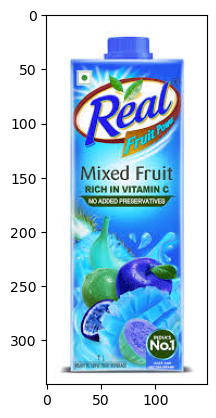

In [40]:
plt.imshow(cv2.imread(path))

In [44]:
ocr_text = get_text(path)
results = match_products(ocr_text, products_dict)
if results:
    print(f"Product found :{results}")
else:
    print(ocr_text)

Product found :{'best_match': 'taj mahal', 'best_corrected_match': 'mtr', 'direct_matches': defaultdict(<class 'int'>, {'taj mahal': 1, 'tata tea gold': 1, 'daily pour by flipkart': 1, 'tata': 1, 'aashirvaad': 1}), 'corrected_matches': defaultdict(<class 'int'>, {'Everest': 2, 'snapin': 1, 'mdh': 2, 'taj mahal': 1, 'tata tea gold': 1, 'dabur': 2, 'daily pour by flipkart': 1, 'mtr': 3, 'aachi': 2, 'zoff': 1, 'eastern': 1, 'tata': 1, 'catch': 1, 'aashirvaad': 1, 'smith & jones': 1, "mother's": 1, 'swastik': 1, 'vanish': 2, 'comfort': 1, 'rin': 2, 'fab': 2, 'soft touch': 1, 'smart wash': 1, 'priya': 2, 'ruchi gold': 1, 'tetley': 1, 'nestea': 1, 'dynamite': 1, 'tide': 1, 'ujala': 1, 'kachi ghani': 1, 'gold winner': 1, 'tata tea chakra gold': 1, 'surf excel': 1, 'fortune': 1})}


In [45]:
ocr_text

['mixed fruit', 'rich', 'vmamin', 'moad ejerereratie;', 'reay', '[ruine']

In [49]:
products_dict['real']

KeyError: 'real'